In [2]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer(ngram_range=(1,1))
v.fit(["thor hathodawala is looking for a job"])
v.vocabulary_

{'thor': 5, 'hathodawala': 1, 'is': 2, 'looking': 4, 'for': 0, 'job': 3}

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer(ngram_range=(1,3))      #### n gram range( min and max)
v.fit(["thor hathodawala is looking for a job"])
v.vocabulary_

{'thor': 12,
 'hathodawala': 2,
 'is': 5,
 'looking': 9,
 'for': 0,
 'job': 8,
 'thor hathodawala': 13,
 'hathodawala is': 3,
 'is looking': 6,
 'looking for': 10,
 'for job': 1,
 'thor hathodawala is': 14,
 'hathodawala is looking': 4,
 'is looking for': 7,
 'looking for job': 11}

In [43]:
corpus=[
    "thor ate pizza",
    'loki is tall',
    "Loki is eating pizza"
]

In [44]:
import spacy
## load english language model and create nlp object from it
nlp= spacy.load('en_core_web_lg')

In [45]:


def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 
preprocess("Loki is eating pizza")

'Loki eat pizza'

In [47]:
corpus_processed=[preprocess(text) for text in corpus]
corpus_processed

['thor eat pizza', 'loki tall', 'Loki eat pizza']

In [48]:
v=CountVectorizer(ngram_range=(1,3))
v.fit(corpus_processed)
v.vocabulary_        #### that number index or( label encode)of the vocabulary

{'thor': 8,
 'eat': 0,
 'pizza': 6,
 'thor eat': 9,
 'eat pizza': 1,
 'thor eat pizza': 10,
 'loki': 2,
 'tall': 7,
 'loki tall': 5,
 'loki eat': 3,
 'loki eat pizza': 4}

In [52]:
v.transform(["Hulk eat pizza"]).toarray()      ### (inthis output doc present words is 1 and other is 0) 

array([[1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]], dtype=int64)

In [50]:
v.transform(["thor eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1]], dtype=int64)

In [ ]:
##News Category Classification Problem

In [55]:
import pandas as pd
data=pd.read_json('news_dataset.json')

print(data.shape)
data.head()

(12695, 2)


,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [56]:
data.category.value_counts()    ###Handle class imbalance   ### imbalance data so  undersample methode

BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: category, dtype: int64

In [61]:
min_samples=1381          #####  balance the data 
data_business=data[data.category=='BUSINESS'].sample(min_samples,random_state=2022)
data_crime=data[data.category=='CRIME'].sample(min_samples,random_state=2022)
data_science=data[data.category=='SCIENCE'].sample(min_samples,random_state=2022)
data_sports=data[data.category=='SPORTS'].sample(min_samples,random_state=2022)

In [70]:
data_balanced=pd.concat([data_business,data_crime,data_science,data_sports],axis=0)
data_balanced.category.value_counts()

BUSINESS    1381
CRIME       1381
SCIENCE     1381
SPORTS      1381
Name: category, dtype: int64

In [71]:
data_balanced['category_num']=data_balanced.category.map({
    'BUSINESS':0,
    'CRIME':1,       #####Convert text category to a number
    'SCIENCE':2,
    'SPORTS':3
})

In [72]:
data_balanced.head()

,text,category,category_num
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0
502,How to Market Your Business While Traveling th...,BUSINESS,0
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0


In [74]:
from sklearn.model_selection import train_test_split     ###Build a model with original text (no pre processing)
x_train,x_test,y_train,y_test=train_test_split(
              data_balanced.text,
              data_balanced.category_num,
               test_size=0.2,
                random_state=2022,
                stratify=data_balanced.category_num)
                                        


In [77]:
print(x_train.shape)
x_train.head()

(4419,)


4769     Here's Why You Don't Bully A Poker Pro With 27...
5724     Our Long National Deflategate Nightmare Is Bac...
3275     Virginia Mayor Arrested In Meth-For-Sex Sting ...
10955    Why This Psychologist Thinks The Science Behin...
6631     World's Atmospheric CO2 Spiked To A Record Las...
Name: text, dtype: object

In [78]:
y_test.value_counts()

1    277
0    276
3    276
2    276
Name: category_num, dtype: int64

In [83]:
#### 1-gram which is nothing but a Bag Of Words (BOW) model


from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report 


clf=Pipeline([('vectorizer_bow',CountVectorizer()),
             ('Multi NB',MultinomialNB())
             ])
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       276
           1       0.86      0.90      0.88       277
           2       0.92      0.78      0.84       276
           3       0.90      0.84      0.87       276

    accuracy                           0.85      1105
   macro avg       0.86      0.85      0.85      1105
weighted avg       0.86      0.85      0.85      1105



In [85]:
###Use 1-gram and bigrams

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report 


clf=Pipeline([('vectorizer_bow',CountVectorizer(ngram_range=(1,2))),
             ('Multi NB',MultinomialNB())
             ])
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77       276
           1       0.86      0.87      0.86       277
           2       0.92      0.72      0.80       276
           3       0.91      0.78      0.84       276

    accuracy                           0.82      1105
   macro avg       0.84      0.82      0.82      1105
weighted avg       0.84      0.82      0.82      1105



In [86]:
###Use 1-gram to trigrams

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report 


clf=Pipeline([('vectorizer_bow',CountVectorizer(ngram_range=(1,3))),
             ('Multi NB',MultinomialNB())
             ])
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.91      0.76       276
           1       0.87      0.86      0.86       277
           2       0.92      0.70      0.79       276
           3       0.91      0.76      0.83       276

    accuracy                           0.81      1105
   macro avg       0.84      0.81      0.81      1105
weighted avg       0.84      0.81      0.81      1105



In [88]:
x_test[:5]

3716    African Nation Slaps Exxon With Fine Nearly 7 ...
1469    Gareth Bale's Inch-Perfect Free Kick Is Unfair...
9269    7 Times The NBA Suspended A Player For Doing W...
1346    Build Loyalty -- The Cost -- $00.00 Remember y...
4050    Here's What Made T. Rex's Big, Knife-Like Teet...
Name: text, dtype: object

In [89]:
y_test[:5]

3716    0
1469    3
9269    3
1346    0
4050    2
Name: category_num, dtype: int64

In [90]:
y_pred[:5]

array([0, 3, 3, 0, 2], dtype=int64)

'BUSINESS':0,
    'CRIME':1,
    'SCIENCE':2,
    'SPORTS':3

In [ ]:
#####Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [91]:
data_balanced['preprocessed_txt']=data_balanced.text.apply(preprocess)

In [92]:
data_balanced.head()

,text,category,category_num,preprocessed_txt
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0,GCC Business Leaders remain Confident face Reg...
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0,Honest Review employee wake morning love impor...
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0,Mike McDerment ceo FreshBooks talk give build ...
502,How to Market Your Business While Traveling th...,BUSINESS,0,market business travel World recently amazing ...
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0,leverage intuition decision making feel safe r...


In [93]:
x_train,x_test,y_train,y_test=train_test_split(
              data_balanced.text,
              data_balanced.category_num,
               test_size=0.2,  
                random_state=2022,
                stratify=data_balanced.category_num)

In [94]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report 


clf=Pipeline([('vectorizer_bow',CountVectorizer(ngram_range=(1,2))),
             ('Multi NB',MultinomialNB())
             ])
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77       276
           1       0.86      0.87      0.86       277
           2       0.92      0.72      0.80       276
           3       0.91      0.78      0.84       276

    accuracy                           0.82      1105
   macro avg       0.84      0.82      0.82      1105
weighted avg       0.84      0.82      0.82      1105



###Plot confusion matrix

In [95]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
CM

array([[251,  11,   6,   8],
       [ 23, 240,   7,   7],
       [ 66,   6, 198,   6],
       [ 34,  23,   5, 214]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

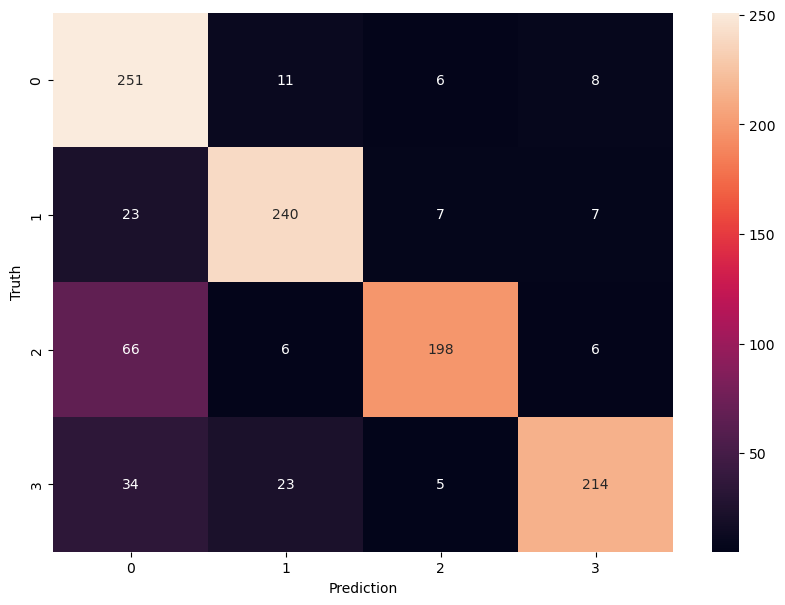

In [96]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(CM, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')